In [1]:
# import libraries
import sqlite3 as sq3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Connect to database
path_pre = 'data/cruise_pre.db'
path_post = 'data/cruise_post.db'
conn_pre = sq3.Connection(path_pre)
conn_post = sq3.Connection(path_post)

In [3]:
# Query and load data into Dataframe
query_pre = """
SELECT * 
FROM cruise_pre;
"""
query_post = """
SELECT * 
FROM cruise_post;
"""

In [4]:
# View first 5 rows of cruise_pre db
df_pre = pd.read_sql(query_pre, conn_pre)                                 
df_pre.head()


,index,Gender,Date of Birth,Source of Traffic,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,Cabin Comfort,Onboard Entertainment,Cabin service,Baggage handling,Port Check-in Service,Onboard Service,Cleanliness,Ext_Intcode
0,0,None,05/10/1973,Direct - Company Website,A little important,3.0,5.0,3.0,01/01/2023 0:00,Very important,2.0,2.0,A little important,2.0,2.0,4.0,2.0,3.0,LB446RWOOZI
1,1,Female,None,Indirect - Social Media,Not at all important,4.0,1.0,NaN,01/01/2023 0:01,Very important,NaN,4.0,None,2.0,3.0,4.0,4.0,4.0,LB138HKBECM
2,2,Female,22/07/1998,Indirect - Search Engine,None,3.0,0.0,5.0,01/01/2023 0:02,None,NaN,5.0,Extremely important,2.0,1.0,2.0,3.0,NaN,BL713UHBAAN
3,3,Female,01/05/1970,Direct - Company Website,Very important,4.0,4.0,4.0,01/01/2023 0:05,Somewhat important,4.0,4.0,None,NaN,NaN,3.0,2.0,4.0,LB243DMKCFL
4,4,Male,07/01/1960,Direct - Company Website,Somewhat important,4.0,2.0,NaN,01/01/2023 0:06,Not at all important,2.0,NaN,Not at all important,3.0,NaN,5.0,2.0,NaN,LB218CFLOBS


In [5]:
# View first 5 rows of cruise_post db
df_post = pd.read_sql(query_post, conn_post)                                 
df_post.head()

,index,Cruise Name,Ticket Type,Cruise Distance,Ext_Intcode,WiFi,Dining,Entertainment
0,0,Blastoise,None,3567 KM,LB446RWOOZI,1.0,1,1.0
1,1,Blastoise,Deluxe,672 KM,LB138HKBECM,NaN,0,1.0
2,2,IAPRAS,Deluxe,1167 KM,BL713UHBAAN,NaN,0,0.0
3,3,Lapras,Deluxe,280 KM,LB243DMKCFL,NaN,0,1.0
4,4,Lapras,Standard,1145 Miles,LB218CFLOBS,NaN,1,NaN


In [6]:
# show min and max values of WiFi, Entertainment and Dining Columns
max_wifi = df_post['WiFi'].max()
min_wifi = df_post['WiFi'].min()

max_entertainment = df_post['Entertainment'].max()
min_entertainment = df_post['Entertainment'].min()

max_dining = df_post['Dining'].max()
min_dining = df_post['Dining'].min()

print("Max value of WiFi column:", max_wifi)
print("Min value of WiFi column:", min_wifi)

print("Max value of Entertainment column:", max_entertainment)
print("Min value of Entertainment column:", min_entertainment)

print("Max value of Dining column:", max_dining)
print("Min value of Dining column:", min_dining)

Max value of WiFi column: 1.0
Min value of WiFi column: 0.0
Max value of Entertainment column: 1.0
Min value of Entertainment column: 0.0
Max value of Dining column: 1
Min value of Dining column: 0


In [7]:
# Checking number of rows with NaN in Wifi column
nan_wifi_rows = df_post[df_post['WiFi'].isna()]
print(len(nan_wifi_rows))

69734


In [8]:
# Checking number of rows with NaN in Dining column
nan_dining_rows = df_post[df_post['Dining'].isna()]
print(len(nan_dining_rows))

0


In [9]:
# Checking number of rows with NaN in Entertainment column
nan_ent_rows = df_post[df_post['Entertainment'].isna()]
print(len(nan_ent_rows))

60057


In [10]:
# Show distinct values of Entertainment, Dining and WiFi by Cruise Name
grouped = df_post.groupby('Cruise Name')

entertainment_values = grouped['Entertainment'].unique()
dining_values = grouped['Dining'].unique()
wifi_values = grouped['WiFi'].unique()

print("Distinct values of Entertainment for each Cruise Name:")
print(entertainment_values)

print("\nDistinct values of Dining for each Cruise Name:")
print(dining_values)

print("\nDistinct values of WiFi for each Cruise Name:")
print(wifi_values)

Distinct values of Entertainment for each Cruise Name:
Cruise Name
Blastoise    [1.0, nan, 0.0]
IAPRAS       [0.0, 1.0, nan]
Lapras       [1.0, nan, 0.0]
blast        [nan, 1.0, 0.0]
blast0ise    [nan, 1.0, 0.0]
blastoise    [nan, 0.0, 1.0]
lap          [1.0, nan, 0.0]
lapras       [0.0, nan, 1.0]
Name: Entertainment, dtype: object

Distinct values of Dining for each Cruise Name:
Cruise Name
Blastoise    [1, 0]
IAPRAS       [0, 1]
Lapras       [0, 1]
blast        [0, 1]
blast0ise    [1, 0]
blastoise    [0, 1]
lap          [0, 1]
lapras       [1, 0]
Name: Dining, dtype: object

Distinct values of WiFi for each Cruise Name:
Cruise Name
Blastoise    [1.0, nan, 0.0]
IAPRAS       [nan, 0.0, 1.0]
Lapras       [nan, 1.0, 0.0]
blast        [nan, 0.0, 1.0]
blast0ise    [nan, 1.0, 0.0]
blastoise    [nan, 0.0, 1.0]
lap          [0.0, nan, 1.0]
lapras       [0.0, nan, 1.0]
Name: WiFi, dtype: object


In [11]:
# Assumptions at this point of time: For Wifi, Dining and Entertainment, 1 or 1.0 denotes that the feature is available and 
# 0 or 0.0 means that it is not available on the cruise

In [12]:
# Check for NaN or None values
null_values = df_post[df_post['Cruise Name'].isnull()]
print(null_values)

         index Cruise Name Ticket Type Cruise Distance  Ext_Intcode  WiFi  \
9            9        None      Luxury            None  LB251DCACEW   0.0   
11          11        None    Standard          802 KM  BL702JYQHRN   NaN   
24          24        None      Luxury          342 KM  LB609ZHJSQZ   1.0   
34          34        None        None          201 KM  LB462UMAIWD   0.0   
56          56        None    Standard          373 KM  BL494RMHQBR   NaN   
...        ...         ...         ...             ...          ...   ...   
133717  133717        None      Luxury          373 KM  BL729CQIIEO   1.0   
133725  133725        None      Luxury         3800 KM  BL163ITEIJL   1.0   
133734  133734        None      Luxury         1900 KM  LB245RUPPSR   1.0   
133738  133738        None        None         2475 KM  LB441ARMTRU   1.0   
133740  133740        None    Standard            None  BL862YWCXGQ   NaN   

        Dining  Entertainment  
9            0            1.0  
11         

In [13]:
# There are too many rows with None values under Cruise Name. Let's check the number of rows where `Cruise Name` 
# and `Ticket Type` are `None`.
filtered_rows = df_post[(df_post['Cruise Name'].isnull()) & (df_post['Ticket Type'].isnull())]
print("Filtered Rows/Total Rows: {}/{}".format(len(filtered_rows), len(df_post)))
print("Percentage: ", (len(filtered_rows)/len(df_post))*100, "%")

Filtered Rows/Total Rows: 2395/133746
Percentage:  1.7907077594843959 %


In [14]:
# I will remove those rows which `Cruise Name` is `None` 
# and `Ticket Type` is None as those data does not give 
# much insight as we want to predict the `Ticket Type` and the proportion of it to the dataset is very small
# I will need to merge the cruise_pre and cruise_post data frames first
df_merged = df_pre.merge(df_post, on='Ext_Intcode')
df_merged.head()

,index_x,Gender,Date of Birth,Source of Traffic,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,...,Onboard Service,Cleanliness,Ext_Intcode,index_y,Cruise Name,Ticket Type,Cruise Distance,WiFi,Dining,Entertainment
0,0,None,05/10/1973,Direct - Company Website,A little important,3.0,5.0,3.0,01/01/2023 0:00,Very important,...,2.0,3.0,LB446RWOOZI,0,Blastoise,None,3567 KM,1.0,1,1.0
1,1,Female,None,Indirect - Social Media,Not at all important,4.0,1.0,NaN,01/01/2023 0:01,Very important,...,4.0,4.0,LB138HKBECM,1,Blastoise,Deluxe,672 KM,NaN,0,1.0
2,2,Female,22/07/1998,Indirect - Search Engine,None,3.0,0.0,5.0,01/01/2023 0:02,None,...,3.0,NaN,BL713UHBAAN,2,IAPRAS,Deluxe,1167 KM,NaN,0,0.0
3,3,Female,01/05/1970,Direct - Company Website,Very important,4.0,4.0,4.0,01/01/2023 0:05,Somewhat important,...,2.0,4.0,LB243DMKCFL,3,Lapras,Deluxe,280 KM,NaN,0,1.0
4,4,Male,07/01/1960,Direct - Company Website,Somewhat important,4.0,2.0,NaN,01/01/2023 0:06,Not at all important,...,2.0,NaN,LB218CFLOBS,4,Lapras,Standard,1145 Miles,NaN,1,NaN


In [15]:
print(df_merged.describe())

             index_x  Embarkation/Disembarkation time convenient  \
count  141538.000000                               125005.000000   
mean    66878.733923                                    3.055886   
std     38610.953197                                    1.525412   
min         0.000000                                    0.000000   
25%     33440.250000                                    2.000000   
50%     66880.500000                                    3.000000   
75%    100320.750000                                    4.000000   
max    133745.000000                                    5.000000   

       Ease of Online booking  Gate location  Online Check-in  Cabin Comfort  \
count           122047.000000  123400.000000    124909.000000  116917.000000   
mean                 2.759642       2.978104         3.249790       3.440193   
std                  1.400819       1.277604         1.351436       1.321744   
min                  0.000000       0.000000         0.000000      

In [16]:
# Removing the rows where `Cruise Name` and `Ticket Type` are `None` in the same row
print("No. or rows that has both Cruise Name and Ticket Type of None values: ", len(filtered_rows), "\n")
print("No. or rows before drop: ", len(df_merged), "\n")
df_merged = df_merged.drop(df_merged[(df_merged['Cruise Name'].isnull()) & (df_merged['Ticket Type'].isnull())].index)
print("No. or rows after drop: ", len(df_merged), "\n")

No. or rows that has both Cruise Name and Ticket Type of None values:  2395 

No. or rows before drop:  141538 

No. or rows after drop:  138990 



In [17]:
# Check for empty strings in Cruise Name
empty_strings = df_merged[df_merged['Cruise Name'] == '']
print(empty_strings)

Empty DataFrame
Columns: [index_x, Gender, Date of Birth, Source of Traffic, Onboard Wifi Service, Embarkation/Disembarkation time convenient, Ease of Online booking, Gate location, Logging, Onboard Dining Service, Online Check-in, Cabin Comfort, Onboard Entertainment, Cabin service, Baggage handling, Port Check-in Service, Onboard Service, Cleanliness, Ext_Intcode, index_y, Cruise Name, Ticket Type, Cruise Distance, WiFi, Dining, Entertainment]
Index: []

[0 rows x 26 columns]


In [18]:
# Replacing the Cruise Names that are similar but with discrepancies in lower case e.g. blast0ise to blastoise
df_merged['Cruise Name'] = df_merged['Cruise Name'].str.replace(r'(?i)blast[o0]ise', 'blastoise', regex=True)
df_merged['Cruise Name'] = df_merged['Cruise Name'].str.replace(r'(?i)^blast$', 'blastoise', regex=True)
df_merged['Cruise Name'] = df_merged['Cruise Name'].str.replace(r'(?i)[lI]apras', 'lapras', regex=True)
df_merged['Cruise Name'] = df_merged['Cruise Name'].str.replace(r'(?i)^lap$', 'lapras', regex=True)

In [19]:
# Check distinct values of Entertainment, Dining and WiFi by Cruise Name again to view result of change
grouped = df_merged.groupby('Cruise Name')

entertainment_values = grouped['Entertainment'].unique()
dining_values = grouped['Dining'].unique()
wifi_values = grouped['WiFi'].unique()

print("Distinct values of Entertainment for each Cruise Name:")
print(entertainment_values)

print("\nDistinct values of Dining for each Cruise Name:")
print(dining_values)

print("\nDistinct values of WiFi for each Cruise Name:")
print(wifi_values)

Distinct values of Entertainment for each Cruise Name:
Cruise Name
blastoise    [1.0, nan, 0.0]
lapras       [0.0, 1.0, nan]
Name: Entertainment, dtype: object

Distinct values of Dining for each Cruise Name:
Cruise Name
blastoise    [1, 0]
lapras       [0, 1]
Name: Dining, dtype: object

Distinct values of WiFi for each Cruise Name:
Cruise Name
blastoise    [1.0, nan, 0.0]
lapras       [nan, 0.0, 1.0]
Name: WiFi, dtype: object


In [20]:
# Checking the distinct values of WiFi, Dining and `Entertainment` of each `Ticket Type` of each `Cruise Name`
grouped = df_merged.groupby(['Cruise Name', 'Ticket Type'])

wifi_values = grouped['WiFi'].unique()
dining_values = grouped['Dining'].unique()
entertainment_values = grouped['Entertainment'].unique()

print("Distinct WiFi values for each Ticket Type of Cruise Name:")
print(wifi_values)

print("\nDistinct Dining values for each Ticket Type of Cruise Name:")
print(dining_values)

print("\nDistinct Entertainment values for each Ticket Type of Cruise Name:")
print(entertainment_values)


Distinct WiFi values for each Ticket Type of Cruise Name:
Cruise Name  Ticket Type
blastoise    Deluxe              [nan]
             Luxury         [1.0, 0.0]
             Standard            [nan]
lapras       Deluxe              [nan]
             Luxury         [0.0, 1.0]
             Standard            [nan]
Name: WiFi, dtype: object

Distinct Dining values for each Ticket Type of Cruise Name:
Cruise Name  Ticket Type
blastoise    Deluxe         [0, 1]
             Luxury         [0, 1]
             Standard       [0, 1]
lapras       Deluxe         [0, 1]
             Luxury         [0, 1]
             Standard       [1, 0]
Name: Dining, dtype: object

Distinct Entertainment values for each Ticket Type of Cruise Name:
Cruise Name  Ticket Type
blastoise    Deluxe         [1.0, 0.0]
             Luxury         [0.0, 1.0]
             Standard            [nan]
lapras       Deluxe         [0.0, 1.0]
             Luxury         [1.0, 0.0]
             Standard            [nan]
Name: 

In [21]:
# Assumptions at this point of time: I have changed my assumptions. For Wifi, Dining and Entertainment, 1 or 1.0 denotes that the 
# feature is used and 0 or 0.0 means that it is not used by the customer on the cruise. Furthermore, I also assume now that only 
# 1. Luxury Ticket Types have Wifi, 
# 2. All Ticket Types have Dining and 
# 3. Only the Standard Ticket Types does not have Entertainment provided.
# Based on the assumptions above, I will replace the values of WiFi and Entertainment of NaN to 0 and the values where not NaN to 1 as it should denote whether if WiFi 
# and Entertainment are available for the Ticket Type regardless of whether they are used.

# Replace NaN values in WiFi, Dining and Entertainment columns with 0 and non NaN values with 1
df_merged['WiFi'] = np.where(pd.isna(df_merged['WiFi']), 0, 1)
df_merged['Dining'] = np.where(pd.isna(df_merged['WiFi']), 0, 1)
df_merged['Entertainment'] = np.where(pd.isna(df_merged['Entertainment']), 0, 1)
df_merged.head(10)

,index_x,Gender,Date of Birth,Source of Traffic,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,...,Onboard Service,Cleanliness,Ext_Intcode,index_y,Cruise Name,Ticket Type,Cruise Distance,WiFi,Dining,Entertainment
0,0,None,05/10/1973,Direct - Company Website,A little important,3.0,5.0,3.0,01/01/2023 0:00,Very important,...,2.0,3.0,LB446RWOOZI,0,blastoise,None,3567 KM,1,1,1
1,1,Female,None,Indirect - Social Media,Not at all important,4.0,1.0,NaN,01/01/2023 0:01,Very important,...,4.0,4.0,LB138HKBECM,1,blastoise,Deluxe,672 KM,0,1,1
2,2,Female,22/07/1998,Indirect - Search Engine,None,3.0,0.0,5.0,01/01/2023 0:02,None,...,3.0,NaN,BL713UHBAAN,2,lapras,Deluxe,1167 KM,0,1,1
3,3,Female,01/05/1970,Direct - Company Website,Very important,4.0,4.0,4.0,01/01/2023 0:05,Somewhat important,...,2.0,4.0,LB243DMKCFL,3,lapras,Deluxe,280 KM,0,1,1
4,4,Male,07/01/1960,Direct - Company Website,Somewhat important,4.0,2.0,NaN,01/01/2023 0:06,Not at all important,...,2.0,NaN,LB218CFLOBS,4,lapras,Standard,1145 Miles,0,1,0
5,4,Male,07/01/1960,Direct - Company Website,Somewhat important,4.0,2.0,NaN,01/01/2023 0:06,Not at all important,...,2.0,NaN,LB218CFLOBS,5,lapras,Standard,1145 Miles,0,1,0
6,5,Male,07/01/1960,Direct - Company Website,Somewhat important,4.0,2.0,NaN,01/01/2023 0:11,Not at all important,...,2.0,1.0,LB218CFLOBS,4,lapras,Standard,1145 Miles,0,1,0
7,5,Male,07/01/1960,Direct - Company Website,Somewhat important,4.0,2.0,NaN,01/01/2023 0:11,Not at all important,...,2.0,1.0,LB218CFLOBS,5,lapras,Standard,1145 Miles,0,1,0
8,6,Male,23/12/1986,Direct - Email Marketing,Somewhat important,5.0,3.0,3.0,01/01/2023 0:11,Very important,...,4.0,4.0,BL115AWWXPU,6,lapras,Standard,607 KM,0,1,0
9,7,Male,20/03/1987,Indirect - Social Media,Very important,1.0,4.0,4.0,01/01/2023 0:12,A little important,...,NaN,2.0,LB313ANTIPC,7,blastoise,None,528 KM,0,1,0


In [22]:
# Show Distinct Values of Ticket Type 
ticket_type_values = df_merged['Ticket Type'].unique()
print(ticket_type_values)

[None 'Deluxe' 'Standard' 'Luxury']


In [23]:
# Based on these assumptions:
# 1. Luxury Ticket Types have Wifi, 
# 2. All Ticket Types have Dining and 
# 3. Only the Standard Ticket Types does not have Entertainment provided.
# I will replace Ticket Types with None values with "Luxury" if it has WiFi, "Deluxe" if it has Entertainment but no WiFi 
# and "Standard" if it only has Dining.

# Check for Ticket Types with None values
none_count = df_merged[df_merged['Ticket Type'].isnull()].shape[0]
print(f"Number of rows where Ticket Type is None: {none_count}")

Number of rows where Ticket Type is None: 18708


In [24]:
# Define the function to determine the Ticket Type
def assign_ticket_type(wifi, dining, entertainment):
    if wifi:
        return "Luxury"
    elif entertainment and not wifi:
        return "Deluxe"
    elif dining and not wifi and not entertainment:
        return "Standard"
    else:
        return None

# Apply the function to rows where Ticket Type is None
mask = df_merged['Ticket Type'].isnull()
df_merged.loc[mask, 'Ticket Type'] = df_merged[mask].apply(lambda x: assign_ticket_type(x['WiFi'], x['Dining'], x['Entertainment']), axis=1)

df_merged.head()

,index_x,Gender,Date of Birth,Source of Traffic,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,...,Onboard Service,Cleanliness,Ext_Intcode,index_y,Cruise Name,Ticket Type,Cruise Distance,WiFi,Dining,Entertainment
0,0,None,05/10/1973,Direct - Company Website,A little important,3.0,5.0,3.0,01/01/2023 0:00,Very important,...,2.0,3.0,LB446RWOOZI,0,blastoise,Luxury,3567 KM,1,1,1
1,1,Female,None,Indirect - Social Media,Not at all important,4.0,1.0,NaN,01/01/2023 0:01,Very important,...,4.0,4.0,LB138HKBECM,1,blastoise,Deluxe,672 KM,0,1,1
2,2,Female,22/07/1998,Indirect - Search Engine,None,3.0,0.0,5.0,01/01/2023 0:02,None,...,3.0,NaN,BL713UHBAAN,2,lapras,Deluxe,1167 KM,0,1,1
3,3,Female,01/05/1970,Direct - Company Website,Very important,4.0,4.0,4.0,01/01/2023 0:05,Somewhat important,...,2.0,4.0,LB243DMKCFL,3,lapras,Deluxe,280 KM,0,1,1
4,4,Male,07/01/1960,Direct - Company Website,Somewhat important,4.0,2.0,NaN,01/01/2023 0:06,Not at all important,...,2.0,NaN,LB218CFLOBS,4,lapras,Standard,1145 Miles,0,1,0


In [25]:
# Check for anymore Ticket Types with None values
none_count = df_merged[df_merged['Ticket Type'].isnull()].shape[0]
print(f"Number of rows where Ticket Type is None: {none_count}")

Number of rows where Ticket Type is None: 0


In [26]:
# Check distinct values of `Cruise Distance`
last_three_distance_unique = df_merged['Cruise Distance'].str[-3:].unique()
print(last_three_distance_unique)

[' KM' 'les' None]


In [27]:
# The Cruise Distance are either in KM or miles or None
# Count None values of Cruise Distance
print(df_merged['Cruise Distance'] == None)

0         False
1         False
2         False
3         False
4         False
          ...  
141533    False
141534    False
141535    False
141536    False
141537    False
Name: Cruise Distance, Length: 138990, dtype: bool


In [28]:
# Show some rows where Cruise Distance is None
filtered_rows = df_merged[pd.isna(df_merged['Cruise Distance'])]
print(filtered_rows)

        index_x  Gender Date of Birth         Source of Traffic  \
10            8  Female    20/12/1981  Direct - Email Marketing   
11            9  Female    26/07/1980  Direct - Company Website   
21           17    Male    01/11/1971  Direct - Company Website   
38           32    Male    28/09/1957  Direct - Company Website   
62           52  Female    21/10/2008  Direct - Email Marketing   
...         ...     ...           ...                       ...   
141476   133690  Female    13/02/2000  Direct - Email Marketing   
141481   133695    Male    23/02/1995  Direct - Company Website   
141506   133718    None    20/10/1978   Indirect - Social Media   
141525   133735    Male          None  Direct - Company Website   
141530   133740    Male    10/07/1987  Direct - Company Website   

        Onboard Wifi Service  Embarkation/Disembarkation time convenient  \
10       Extremely important                                         4.0   
11      Not at all important               

In [29]:
# Convert 'Cruise Distance' values to numeric and remove 'KM' and 'Miles'
def standardize_distance(distance):
    if pd.isna(distance):
        return distance
    if 'KM' in distance:
        return float(distance.replace('KM', '').strip())
    elif 'Miles' in distance:  # Assuming that 1 Mile : 1.60934 KM
        return float(distance.replace('Miles', '').strip()) * 1.60934
    else:
        return float(distance)

df_merged['Cruise Distance'] = df_merged['Cruise Distance'].apply(standardize_distance)

# Impute None values in 'Cruise Distance' with the median
median_distance = df_merged['Cruise Distance'].median()
df_merged['Cruise Distance'].fillna(median_distance, inplace=True)

df_merged.head()

,index_x,Gender,Date of Birth,Source of Traffic,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,...,Onboard Service,Cleanliness,Ext_Intcode,index_y,Cruise Name,Ticket Type,Cruise Distance,WiFi,Dining,Entertainment
0,0,None,05/10/1973,Direct - Company Website,A little important,3.0,5.0,3.0,01/01/2023 0:00,Very important,...,2.0,3.0,LB446RWOOZI,0,blastoise,Luxury,3567.0000,1,1,1
1,1,Female,None,Indirect - Social Media,Not at all important,4.0,1.0,NaN,01/01/2023 0:01,Very important,...,4.0,4.0,LB138HKBECM,1,blastoise,Deluxe,672.0000,0,1,1
2,2,Female,22/07/1998,Indirect - Search Engine,None,3.0,0.0,5.0,01/01/2023 0:02,None,...,3.0,NaN,BL713UHBAAN,2,lapras,Deluxe,1167.0000,0,1,1
3,3,Female,01/05/1970,Direct - Company Website,Very important,4.0,4.0,4.0,01/01/2023 0:05,Somewhat important,...,2.0,4.0,LB243DMKCFL,3,lapras,Deluxe,280.0000,0,1,1
4,4,Male,07/01/1960,Direct - Company Website,Somewhat important,4.0,2.0,NaN,01/01/2023 0:06,Not at all important,...,2.0,NaN,LB218CFLOBS,4,lapras,Standard,1842.6943,0,1,0


In [30]:
# Check for anymore Ticket Types with negative values
cd_none_count = df_merged[df_merged['Cruise Distance'] < 0].shape[0]
print(f"Number of rows where Cruise Distance is negative: {cd_none_count}")

Number of rows where Cruise Distance is negative: 9224


In [31]:
# show min and max values of Cruise Distance Columns
max_dist = df_merged['Cruise Distance'].max()
min_dist = df_merged['Cruise Distance'].min()

print("Max value of Cruise Distance column:", max_dist)
print("Min value of Cruise Distance column:", min_dist)

Max value of Cruise Distance column: 7987.15442
Min value of Cruise Distance column: -6416.43858


In [32]:
# Assuming that the negative values are errors but are the actual distance in positive state. Therefore, I will remove the negative signs
df_merged['Cruise Distance'] = df_merged['Cruise Distance'].apply(lambda x: abs(x))
cd_none_count = df_merged[df_merged['Cruise Distance'] < 0].shape[0]
print(f"Number of rows where Cruise Distance is negative: {cd_none_count}")

Number of rows where Cruise Distance is negative: 0


In [33]:
# Check unique values of Source of Traffic, Onboard Wifi Service, Embarkation/Disembarkation time convenient, Ease of Online booking
# Gate location Onboard Dining Service, 'Online Check-in', 'Cabin Comfort', 'Onboard Entertainment', 'Cabin service', 'Baggage handling',
# 'Port Check-in Service', Onboard Service and Cleanliness	
df_merged['Cruise Distance']

0         3567.0000
1          672.0000
2         1167.0000
3          280.0000
4         1842.6943
            ...    
141533    1506.0000
141534    1506.0000
141535     240.0000
141536    1947.0000
141537      80.0000
Name: Cruise Distance, Length: 138990, dtype: float64

In [34]:
gender_unique = df_merged['Gender'].unique()
print("Unique values in 'Gender':", gender_unique)

source_of_traffic_unique = df_merged['Source of Traffic'].unique()
print("Unique values in 'Source of Traffic':", source_of_traffic_unique)

onboard_wifi_service_unique = df_merged['Onboard Wifi Service'].unique()
print("\nUnique values in 'Onboard Wifi Service':", onboard_wifi_service_unique)

embarkation_disembarkation_time_unique = df_merged['Embarkation/Disembarkation time convenient'].unique()
print("\nUnique values in 'Embarkation/Disembarkation time convenient':", embarkation_disembarkation_time_unique)

ease_of_online_booking_unique = df_merged['Ease of Online booking'].unique()
print("\nUnique values in 'Ease of Online booking':", ease_of_online_booking_unique)

gate_location_unique = df_merged['Gate location'].unique()
print("\nUnique values in 'Gate location':", gate_location_unique)

onboard_dining_service_unique = df_merged['Onboard Dining Service'].unique()
print("\nUnique values in 'Onboard Dining Service':", onboard_dining_service_unique)

online_checkin_unique = df_merged['Online Check-in'].unique()
print("\nUnique values in 'Online Check-in':", online_checkin_unique)

cabin_comfort_unique = df_merged['Cabin Comfort'].unique()
print("\nUnique values in 'Cabin Comfort':", cabin_comfort_unique)

onboard_entertainment_unique = df_merged['Onboard Entertainment'].unique()
print("\nUnique values in 'Onboard Entertainment':", onboard_entertainment_unique)

cabin_service_unique = df_merged['Cabin service'].unique()
print("\nUnique values in 'Cabin service':", cabin_service_unique)

baggage_handling_unique = df_merged['Baggage handling'].unique()
print("\nUnique values in 'Baggage handling':", baggage_handling_unique)

port_checkin_service_unique = df_merged['Port Check-in Service'].unique()
print("\nUnique values in 'Port Check-in Service':", port_checkin_service_unique)

onboard_service_unique = df_merged['Onboard Service'].unique()
print("\nUnique values in 'Onboard Service':", onboard_service_unique)

cleanliness_unique = df_merged['Cleanliness'].unique()
print("\nUnique values in 'Cleanliness':", cleanliness_unique)


Unique values in 'Gender': [None 'Female' 'Male']
Unique values in 'Source of Traffic': ['Direct - Company Website' 'Indirect - Social Media'
 'Indirect - Search Engine' 'Direct - Email Marketing']

Unique values in 'Onboard Wifi Service': ['A little important' 'Not at all important' None 'Very important'
 'Somewhat important' 'Extremely important']

Unique values in 'Embarkation/Disembarkation time convenient': [ 3.  4.  5.  1. nan  2.  0.]

Unique values in 'Ease of Online booking': [ 5.  1.  0.  4.  2.  3. nan]

Unique values in 'Gate location': [ 3. nan  5.  4.  1.  2.  0.]

Unique values in 'Onboard Dining Service': ['Very important' None 'Somewhat important' 'Not at all important'
 'A little important' 'Extremely important']

Unique values in 'Online Check-in': [ 2. nan  4.  1.  0.  5.  3.]

Unique values in 'Cabin Comfort': [ 2.  4.  5. nan  1.  3.  0.]

Unique values in 'Onboard Entertainment': ['A little important' None 'Extremely important' 'Not at all important'
 'Very impor

In [35]:
# From the unique values, I can assume that:
# Source of Traffic - the 4 categorical values are 'Direct - Company Website', 'Indirect - Social Media', 'Indirect - Search Engine' 
#                     and 'Direct - Email Marketing'
# Onboard Wifi Service - the 5 categorical values are 'A little important', 'Not at all important', 'Very important', 'Somewhat important'
#                        and 'Extremely important'. There are also None values that I need to deal with.
# Embarkation/Disembarkation time convenient - The 6 Ordinal data are 0, 1, 2, 3,  4 and  5. There are also NaN values that needs to be
#                                              dealt with.
# Ease of Online booking - The 6 Ordinal data are 0, 1, 2, 3,  4 and  5. There are also NaN values that needs to be dealt with.
# Gate location - The 6 Ordinal data are 0, 1, 2, 3,  4 and  5. There are also NaN values that needs to be dealt with.
# Onboard Dining Service - the 5 categorical values are 'A little important', 'Not at all important', 'Very important', 
#                          'Somewhat important' and 'Extremely important'. There are also None values that I need to deal with.
# Online Check-in - The 6 Ordinal data are 0, 1, 2, 3,  4 and  5. There are also NaN values that needs to be dealt with.
# Cabin Comfort - The 6 Ordinal data are 0, 1, 2, 3,  4 and  5. There are also NaN values that needs to be dealt with.
# Onboard Entertainment - the 5 categorical values are 'A little important', 'Not at all important', 'Very important', 
#                          'Somewhat important' and 'Extremely important'. There are also None values that I need to deal with.
# Cabin service - The 6 Ordinal data are 0, 1, 2, 3,  4 and  5. There are also NaN values that needs to be dealt with.
# Baggage handling - The 6 Ordinal data are 0, 1, 2, 3,  4 and  5. There are also NaN values that needs to be dealt with.
# Port Check-in Service - The 6 Ordinal data are 0, 1, 2, 3,  4 and  5. There are also NaN values that needs to be dealt with.
# Onboard Service and Cleanliness	 - The 6 Ordinal data are 0, 1, 2, 3,  4 and  5. There are also NaN values that needs to be dealt with.
#
# I can infer that these are ratings in the cruise pre-purchase survey about the preferences of the customers.

In [36]:
# I will transform the `Source of Traffic` column to 0: replacing the 2 Indirect sources and 1: replacing the Direct sources
df_merged.loc[df_merged['Source of Traffic'].str.contains('Indirect', na=False), 'Source of Traffic'] = 0
df_merged.loc[df_merged['Source of Traffic'].str.contains('Direct', na=False), 'Source of Traffic'] = 1
# Perform One Hot Encoding as the values are Nominal Data and no clear ranking or order
df_encoded = pd.get_dummies(df_merged, columns=['Source of Traffic'], prefix='Direct Traffic', drop_first=True)
df_encoded.head(10)

,index_x,Gender,Date of Birth,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,...,Cleanliness,Ext_Intcode,index_y,Cruise Name,Ticket Type,Cruise Distance,WiFi,Dining,Entertainment,Direct Traffic_1
0,0,None,05/10/1973,A little important,3.0,5.0,3.0,01/01/2023 0:00,Very important,2.0,...,3.0,LB446RWOOZI,0,blastoise,Luxury,3567.0000,1,1,1,True
1,1,Female,None,Not at all important,4.0,1.0,NaN,01/01/2023 0:01,Very important,NaN,...,4.0,LB138HKBECM,1,blastoise,Deluxe,672.0000,0,1,1,False
2,2,Female,22/07/1998,None,3.0,0.0,5.0,01/01/2023 0:02,None,NaN,...,NaN,BL713UHBAAN,2,lapras,Deluxe,1167.0000,0,1,1,False
3,3,Female,01/05/1970,Very important,4.0,4.0,4.0,01/01/2023 0:05,Somewhat important,4.0,...,4.0,LB243DMKCFL,3,lapras,Deluxe,280.0000,0,1,1,True
4,4,Male,07/01/1960,Somewhat important,4.0,2.0,NaN,01/01/2023 0:06,Not at all important,2.0,...,NaN,LB218CFLOBS,4,lapras,Standard,1842.6943,0,1,0,True
5,4,Male,07/01/1960,Somewhat important,4.0,2.0,NaN,01/01/2023 0:06,Not at all important,2.0,...,NaN,LB218CFLOBS,5,lapras,Standard,1842.6943,0,1,0,True
6,5,Male,07/01/1960,Somewhat important,4.0,2.0,NaN,01/01/2023 0:11,Not at all important,2.0,...,1.0,LB218CFLOBS,4,lapras,Standard,1842.6943,0,1,0,True
7,5,Male,07/01/1960,Somewhat important,4.0,2.0,NaN,01/01/2023 0:11,Not at all important,2.0,...,1.0,LB218CFLOBS,5,lapras,Standard,1842.6943,0,1,0,True
8,6,Male,23/12/1986,Somewhat important,5.0,3.0,3.0,01/01/2023 0:11,Very important,NaN,...,4.0,BL115AWWXPU,6,lapras,Standard,607.0000,0,1,0,True
9,7,Male,20/03/1987,Very important,1.0,4.0,4.0,01/01/2023 0:12,A little important,NaN,...,2.0,LB313ANTIPC,7,blastoise,Standard,528.0000,0,1,0,False


In [37]:
# Onboard Wifi Service - the 5 categorical values has a clear ranking and therefore Ordinal Encoding is suitable for this 
# if we are not using linear models
# Defining mapping for ordinal encoding
ordinal_map = {
    'Not at all important': 0,
    'A little important': 1,
    'Somewhat important': 2,
    'Very important': 3
}

# Applying ordinal encoding
df_encoded['Onboard Wifi Service'] = df_encoded['Onboard Wifi Service'].map(ordinal_map)
df_encoded['Onboard Dining Service'] = df_encoded['Onboard Dining Service'].map(ordinal_map)
df_encoded['Onboard Entertainment'] = df_encoded['Onboard Entertainment'].map(ordinal_map)
ows_none_count = sum(df_encoded['Onboard Wifi Service'].isna())
print(f"Number of rows where Onboard Wifi Service is NaN: {ows_none_count}")
print(f"Percentage of dataset: {round(((ows_none_count/len(df_encoded))*100), 2)}%")
ows_negative_count = df_encoded[df_encoded['Onboard Wifi Service'] < 0].shape[0]
print(f"Number of rows where Onboard Wifi Service is negative: {ows_negative_count}")
print(f"Percentage of dataset: {round(((ows_negative_count/len(df_encoded))*100), 2)}%")

ods_none_count = sum(df_encoded['Onboard Dining Service'].isna())
print(f"Number of rows where Onboard Dining Service is NaN: {ods_none_count}")
print(f"Percentage of dataset: {round(((ods_none_count/len(df_encoded))*100), 2)}%")
ods_negative_count = df_encoded[df_encoded['Onboard Dining Service'] < 0].shape[0]
print(f"Number of rows where Onboard Dining Service is negative: {ods_negative_count}")
print(f"Percentage of dataset: {round(((ods_negative_count/len(df_encoded))*100), 2)}%")

oe_none_count = sum(df_encoded['Onboard Entertainment'].isna())
print(f"Number of rows where Onboard Entertainment is NaN: {oe_none_count}")
print(f"Percentage of dataset: {round(((oe_none_count/len(df_encoded))*100), 2)}%")
oe_negative_count = df_encoded[df_encoded['Onboard Entertainment'] < 0].shape[0]
print(f"Number of rows where Onboard Entertainment is negative: {oe_negative_count}")
print(f"Percentage of dataset: {round(((oe_negative_count/len(df_encoded))*100), 2)}%")

df_encoded.head(30)

Number of rows where Onboard Wifi Service is NaN: 33800
Percentage of dataset: 24.32%
Number of rows where Onboard Wifi Service is negative: 0
Percentage of dataset: 0.0%
Number of rows where Onboard Dining Service is NaN: 43611
Percentage of dataset: 31.38%
Number of rows where Onboard Dining Service is negative: 0
Percentage of dataset: 0.0%
Number of rows where Onboard Entertainment is NaN: 46285
Percentage of dataset: 33.3%
Number of rows where Onboard Entertainment is negative: 0
Percentage of dataset: 0.0%


,index_x,Gender,Date of Birth,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,...,Cleanliness,Ext_Intcode,index_y,Cruise Name,Ticket Type,Cruise Distance,WiFi,Dining,Entertainment,Direct Traffic_1
0,0,None,05/10/1973,1.0,3.0,5.0,3.0,01/01/2023 0:00,3.0,2.0,...,3.0,LB446RWOOZI,0,blastoise,Luxury,3567.00000,1,1,1,True
1,1,Female,None,0.0,4.0,1.0,NaN,01/01/2023 0:01,3.0,NaN,...,4.0,LB138HKBECM,1,blastoise,Deluxe,672.00000,0,1,1,False
2,2,Female,22/07/1998,NaN,3.0,0.0,5.0,01/01/2023 0:02,NaN,NaN,...,NaN,BL713UHBAAN,2,lapras,Deluxe,1167.00000,0,1,1,False
3,3,Female,01/05/1970,3.0,4.0,4.0,4.0,01/01/2023 0:05,2.0,4.0,...,4.0,LB243DMKCFL,3,lapras,Deluxe,280.00000,0,1,1,True
4,4,Male,07/01/1960,2.0,4.0,2.0,NaN,01/01/2023 0:06,0.0,2.0,...,NaN,LB218CFLOBS,4,lapras,Standard,1842.69430,0,1,0,True
5,4,Male,07/01/1960,2.0,4.0,2.0,NaN,01/01/2023 0:06,0.0,2.0,...,NaN,LB218CFLOBS,5,lapras,Standard,1842.69430,0,1,0,True
6,5,Male,07/01/1960,2.0,4.0,2.0,NaN,01/01/2023 0:11,0.0,2.0,...,1.0,LB218CFLOBS,4,lapras,Standard,1842.69430,0,1,0,True
7,5,Male,07/01/1960,2.0,4.0,2.0,NaN,01/01/2023 0:11,0.0,2.0,...,1.0,LB218CFLOBS,5,lapras,Standard,1842.69430,0,1,0,True
8,6,Male,23/12/1986,2.0,5.0,3.0,3.0,01/01/2023 0:11,3.0,NaN,...,4.0,BL115AWWXPU,6,lapras,Standard,607.00000,0,1,0,True
9,7,Male,20/03/1987,3.0,1.0,4.0,4.0,01/01/2023 0:12,1.0,NaN,...,2.0,LB313ANTIPC,7,blastoise,Standard,528.00000,0,1,0,False


In [38]:
# Checking the Gender data as I will be using it for KNN imputation for the negative values of Onboard Wifi Service and Onboard
# Dining Service. There are None values in Gender. I will make half of it to be Male and half to Female to prevent distorting the data
# Find the indices where Gender is None
none_indices = df_encoded[df_encoded['Gender'].isnull()].index.tolist()
# Calculate half length
half_len = len(none_indices) // 2
# Set first half to Male and second half to Female
df_encoded.loc[none_indices[:half_len], 'Gender'] = 'Male'
df_encoded.loc[none_indices[half_len:], 'Gender'] = 'Female'
df_encoded.head()

,index_x,Gender,Date of Birth,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,...,Cleanliness,Ext_Intcode,index_y,Cruise Name,Ticket Type,Cruise Distance,WiFi,Dining,Entertainment,Direct Traffic_1
0,0,Male,05/10/1973,1.0,3.0,5.0,3.0,01/01/2023 0:00,3.0,2.0,...,3.0,LB446RWOOZI,0,blastoise,Luxury,3567.0000,1,1,1,True
1,1,Female,None,0.0,4.0,1.0,NaN,01/01/2023 0:01,3.0,NaN,...,4.0,LB138HKBECM,1,blastoise,Deluxe,672.0000,0,1,1,False
2,2,Female,22/07/1998,NaN,3.0,0.0,5.0,01/01/2023 0:02,NaN,NaN,...,NaN,BL713UHBAAN,2,lapras,Deluxe,1167.0000,0,1,1,False
3,3,Female,01/05/1970,3.0,4.0,4.0,4.0,01/01/2023 0:05,2.0,4.0,...,4.0,LB243DMKCFL,3,lapras,Deluxe,280.0000,0,1,1,True
4,4,Male,07/01/1960,2.0,4.0,2.0,NaN,01/01/2023 0:06,0.0,2.0,...,NaN,LB218CFLOBS,4,lapras,Standard,1842.6943,0,1,0,True


In [39]:
# Check for None values in Gender
print(sum(df_encoded['Gender'].isnull()))

0


In [40]:
# Perform One Hot Encoding as the values in Gender are Nominal Data and no clear ranking or order
df_encoded = pd.get_dummies(df_encoded, columns=['Gender'], drop_first=False)
df_encoded.head()

,index_x,Date of Birth,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,Cabin Comfort,...,index_y,Cruise Name,Ticket Type,Cruise Distance,WiFi,Dining,Entertainment,Direct Traffic_1,Gender_Female,Gender_Male
0,0,05/10/1973,1.0,3.0,5.0,3.0,01/01/2023 0:00,3.0,2.0,2.0,...,0,blastoise,Luxury,3567.0000,1,1,1,True,False,True
1,1,None,0.0,4.0,1.0,NaN,01/01/2023 0:01,3.0,NaN,4.0,...,1,blastoise,Deluxe,672.0000,0,1,1,False,True,False
2,2,22/07/1998,NaN,3.0,0.0,5.0,01/01/2023 0:02,NaN,NaN,5.0,...,2,lapras,Deluxe,1167.0000,0,1,1,False,True,False
3,3,01/05/1970,3.0,4.0,4.0,4.0,01/01/2023 0:05,2.0,4.0,4.0,...,3,lapras,Deluxe,280.0000,0,1,1,True,True,False
4,4,07/01/1960,2.0,4.0,2.0,NaN,01/01/2023 0:06,0.0,2.0,NaN,...,4,lapras,Standard,1842.6943,0,1,0,True,False,True


In [41]:
# Checking the Date of Birth data as I will be using Age for KNN imputation for the negative values of Onboard Wifi Service and Onboard
# Dining Service. 
# Check if all values in 'Date of Birth' are valid datetimes
def all_datetimes(column):
    try:
        pd.to_datetime(column, errors='raise')
        return True
    except:
        return False

print(all_datetimes(df_encoded["Date of Birth"]))  # Output: False

False


In [42]:
# Bin the Date of Birth to Age Groups
# Convert 'Date of Birth' to datetime format
df_encoded['Date of Birth'] = pd.to_datetime(df_encoded['Date of Birth'], errors='coerce', format='%d/%m/%Y')

# Calculate age
current_date = datetime.now()

# Check if the birthday has not occurred yet for this year
before_birthday = (df_encoded['Date of Birth'].dt.month > current_date.month) | ((df_encoded['Date of Birth'].dt.month == current_date.month) & (df_encoded['Date of Birth'].dt.day > current_date.day))
df_encoded['Age'] = current_date.year - df_encoded['Date of Birth'].dt.year - before_birthday.astype(int)

# Handle rows where 'Date of Birth' is NaT (i.e., not a time)
df_encoded['Age'] = df_encoded['Age'].fillna(0).astype(int)

# Define age bins and labels
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create Age Group column based on Age column
df_encoded['Age Group'] = pd.cut(df_encoded['Age'], bins=bins, labels=labels, right=False)

df_encoded.head()

,index_x,Date of Birth,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,Cabin Comfort,...,Ticket Type,Cruise Distance,WiFi,Dining,Entertainment,Direct Traffic_1,Gender_Female,Gender_Male,Age,Age Group
0,0,1973-10-05,1.0,3.0,5.0,3.0,01/01/2023 0:00,3.0,2.0,2.0,...,Luxury,3567.0000,1,1,1,True,False,True,49,41-50
1,1,NaT,0.0,4.0,1.0,NaN,01/01/2023 0:01,3.0,NaN,4.0,...,Deluxe,672.0000,0,1,1,False,True,False,0,0-18
2,2,1998-07-22,NaN,3.0,0.0,5.0,01/01/2023 0:02,NaN,NaN,5.0,...,Deluxe,1167.0000,0,1,1,False,True,False,25,19-30
3,3,1970-05-01,3.0,4.0,4.0,4.0,01/01/2023 0:05,2.0,4.0,4.0,...,Deluxe,280.0000,0,1,1,True,True,False,53,51-60
4,4,1960-01-07,2.0,4.0,2.0,NaN,01/01/2023 0:06,0.0,2.0,NaN,...,Standard,1842.6943,0,1,0,True,False,True,63,61-70


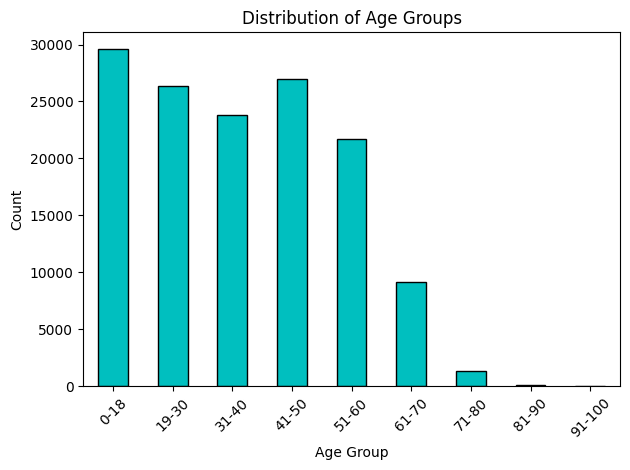

In [43]:
# Check the ages of the people surveyed with a histogram
# Create a histogram
df_encoded['Age Group'].value_counts().sort_index().plot(kind='bar', color='c', edgecolor='black')

plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [44]:
# It seems that the age group 0-18 is a bit too high. I will check into that age group to review further
df_minors = df_encoded[df_encoded["Age"] <= 18]
df_minors.head(20)

,index_x,Date of Birth,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,Cabin Comfort,...,Ticket Type,Cruise Distance,WiFi,Dining,Entertainment,Direct Traffic_1,Gender_Female,Gender_Male,Age,Age Group
1,1,NaT,0.0,4.0,1.0,NaN,01/01/2023 0:01,3.0,NaN,4.0,...,Deluxe,672.0,0,1,1,False,True,False,0,0-18
12,10,2008-05-13,1.0,NaN,NaN,1.0,01/01/2023 0:18,NaN,2.0,3.0,...,Standard,594.0,0,1,0,True,False,True,15,0-18
24,20,2008-05-13,1.0,2.0,NaN,2.0,01/01/2023 0:40,NaN,5.0,5.0,...,Luxury,1783.0,1,1,1,True,False,True,15,0-18
43,37,2009-09-23,1.0,1.0,2.0,3.0,01/01/2023 1:14,3.0,2.0,NaN,...,Standard,1085.0,0,1,0,True,True,False,13,0-18
44,37,2009-09-23,1.0,1.0,2.0,3.0,01/01/2023 1:14,3.0,2.0,NaN,...,Standard,1085.0,0,1,0,True,True,False,13,0-18
45,41,2009-09-23,1.0,1.0,2.0,3.0,01/01/2023 1:19,3.0,2.0,4.0,...,Standard,1085.0,0,1,0,True,True,False,13,0-18
46,41,2009-09-23,1.0,1.0,2.0,3.0,01/01/2023 1:19,3.0,2.0,4.0,...,Standard,1085.0,0,1,0,True,True,False,13,0-18
49,40,NaT,NaN,5.0,0.0,2.0,01/01/2023 1:18,1.0,0.0,2.0,...,Standard,251.0,0,1,0,True,False,True,0,0-18
50,42,2015-10-20,1.0,4.0,NaN,3.0,01/01/2023 1:20,NaN,2.0,3.0,...,Standard,366.0,0,1,0,True,False,True,7,0-18
54,46,NaT,NaN,1.0,1.0,1.0,01/01/2023 1:29,NaN,5.0,NaN,...,Standard,578.0,0,1,0,True,False,True,0,0-18


In [45]:
print(f"Total number of Age Group 0-18: {len(df_minors)}")

Total number of Age Group 0-18: 30669


In [46]:
print(f"Total number of Age == 0: {len(df_encoded[df_encoded['Age'] == 0])}")
print(f"Total number of Date of Birth == NaT: {len(df_encoded[df_encoded['Date of Birth'].isna()])}")
print(f"Percentage to dataset: {round((len(df_encoded[df_encoded['Age'] == 0])/len(df_encoded))*100, 2)}%")

Total number of Age == 0: 20178
Total number of Date of Birth == NaT: 20178
Percentage to dataset: 14.52%


In [47]:
# It seems that the rows of records that has Age = 0 because the Date of Birth is NaT. I will replace these with the median age as I need
# to keep it due to the proportion of it to the whole dataset is quite substantial.
median_age = df_encoded[df_encoded["Age"] > 0]["Age"].median()
print(f"Median Age: {median_age}")
df_encoded.loc[df_encoded["Age"] == 0, "Age"] = median_age
df_encoded.head()

Median Age: 39.0


,index_x,Date of Birth,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,Cabin Comfort,...,Ticket Type,Cruise Distance,WiFi,Dining,Entertainment,Direct Traffic_1,Gender_Female,Gender_Male,Age,Age Group
0,0,1973-10-05,1.0,3.0,5.0,3.0,01/01/2023 0:00,3.0,2.0,2.0,...,Luxury,3567.0000,1,1,1,True,False,True,49,41-50
1,1,NaT,0.0,4.0,1.0,NaN,01/01/2023 0:01,3.0,NaN,4.0,...,Deluxe,672.0000,0,1,1,False,True,False,39,0-18
2,2,1998-07-22,NaN,3.0,0.0,5.0,01/01/2023 0:02,NaN,NaN,5.0,...,Deluxe,1167.0000,0,1,1,False,True,False,25,19-30
3,3,1970-05-01,3.0,4.0,4.0,4.0,01/01/2023 0:05,2.0,4.0,4.0,...,Deluxe,280.0000,0,1,1,True,True,False,53,51-60
4,4,1960-01-07,2.0,4.0,2.0,NaN,01/01/2023 0:06,0.0,2.0,NaN,...,Standard,1842.6943,0,1,0,True,False,True,63,61-70


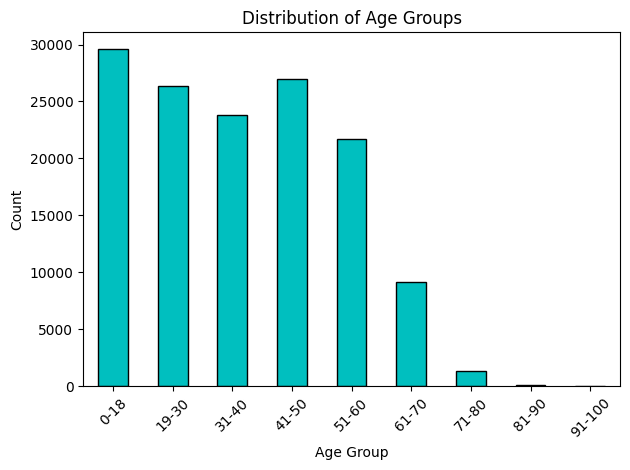

In [48]:
# Check the ages of the people surveyed again with a histogram
# Create a histogram
df_encoded['Age Group'].value_counts().sort_index().plot(kind='bar', color='c', edgecolor='black')

plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [49]:
# The age group 0-18 is still high and skewed to the left. I will deal with this later if necessary. I will now use the mode  of
# each columns to replace the NaN values in all the preferences columns. I had intended to use KNN imputation for real world use case 
# but it is taking too much time and resources for this test and I am running out of time. 

for column in df_encoded.columns:
    df_encoded[column].fillna(df_encoded[column].mode()[0], inplace=True)

df_encoded.head()

,index_x,Date of Birth,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,Cabin Comfort,...,Ticket Type,Cruise Distance,WiFi,Dining,Entertainment,Direct Traffic_1,Gender_Female,Gender_Male,Age,Age Group
0,0,1973-10-05,1.0,3.0,5.0,3.0,01/01/2023 0:00,3.0,2.0,2.0,...,Luxury,3567.0000,1,1,1,True,False,True,49,41-50
1,1,1979-05-04,0.0,4.0,1.0,3.0,01/01/2023 0:01,3.0,4.0,4.0,...,Deluxe,672.0000,0,1,1,False,True,False,39,0-18
2,2,1998-07-22,1.0,3.0,0.0,5.0,01/01/2023 0:02,3.0,4.0,5.0,...,Deluxe,1167.0000,0,1,1,False,True,False,25,19-30
3,3,1970-05-01,3.0,4.0,4.0,4.0,01/01/2023 0:05,2.0,4.0,4.0,...,Deluxe,280.0000,0,1,1,True,True,False,53,51-60
4,4,1960-01-07,2.0,4.0,2.0,3.0,01/01/2023 0:06,0.0,2.0,4.0,...,Standard,1842.6943,0,1,0,True,False,True,63,61-70


In [50]:
print(df_encoded.describe())

             index_x                  Date of Birth  Onboard Wifi Service  \
count  138990.000000                         138990         138990.000000   
mean    66865.945313  1983-05-28 08:24:28.284049216              1.403151   
min         0.000000            1938-01-16 00:00:00              0.000000   
25%     33449.250000            1974-09-16 00:00:00              1.000000   
50%     66866.500000            1980-02-28 00:00:00              1.000000   
75%    100293.750000            1994-02-20 18:00:00              2.000000   
max    133745.000000            2016-12-28 00:00:00              3.000000   
std     38601.104543                            NaN              0.938488   

       Embarkation/Disembarkation time convenient  Ease of Online booking  \
count                               138990.000000           138990.000000   
mean                                     3.165796                2.792186   
min                                      0.000000                0.000000  

In [51]:
# Check for null values again after cleaning and transforming data
print(df_encoded.isnull().sum())

index_x                                       0
Date of Birth                                 0
Onboard Wifi Service                          0
Embarkation/Disembarkation time convenient    0
Ease of Online booking                        0
Gate location                                 0
Logging                                       0
Onboard Dining Service                        0
Online Check-in                               0
Cabin Comfort                                 0
Onboard Entertainment                         0
Cabin service                                 0
Baggage handling                              0
Port Check-in Service                         0
Onboard Service                               0
Cleanliness                                   0
Ext_Intcode                                   0
index_y                                       0
Cruise Name                                   0
Ticket Type                                   0
Cruise Distance                         

/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


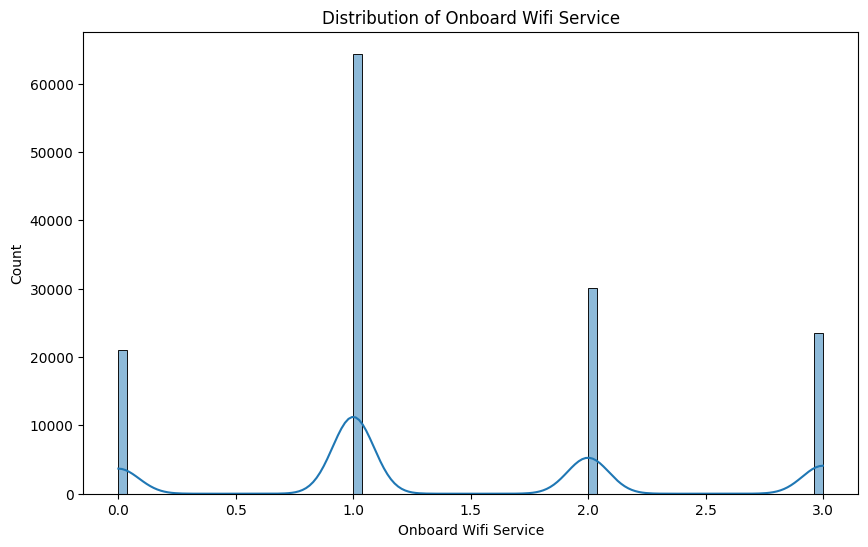

/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


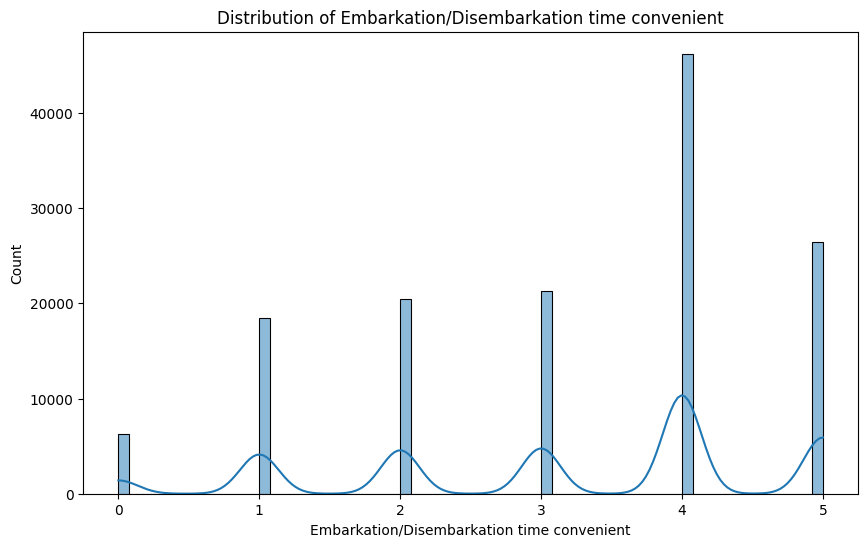

/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


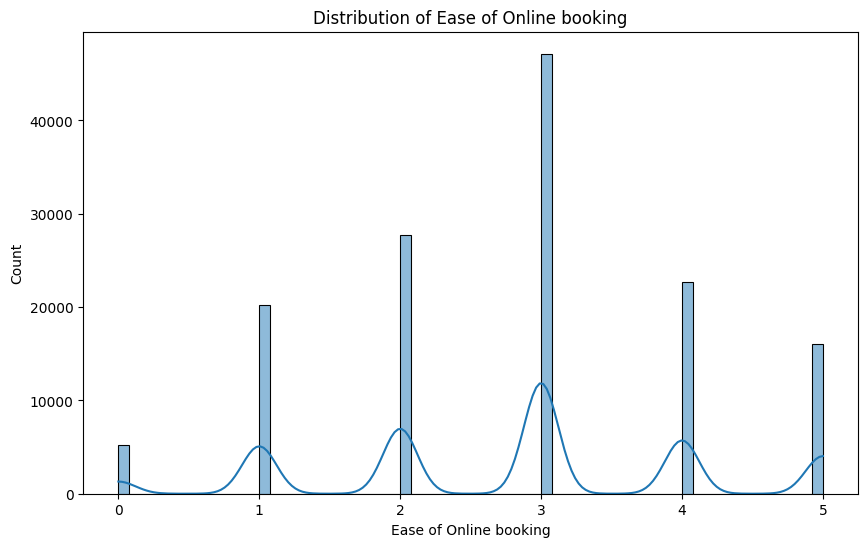

/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


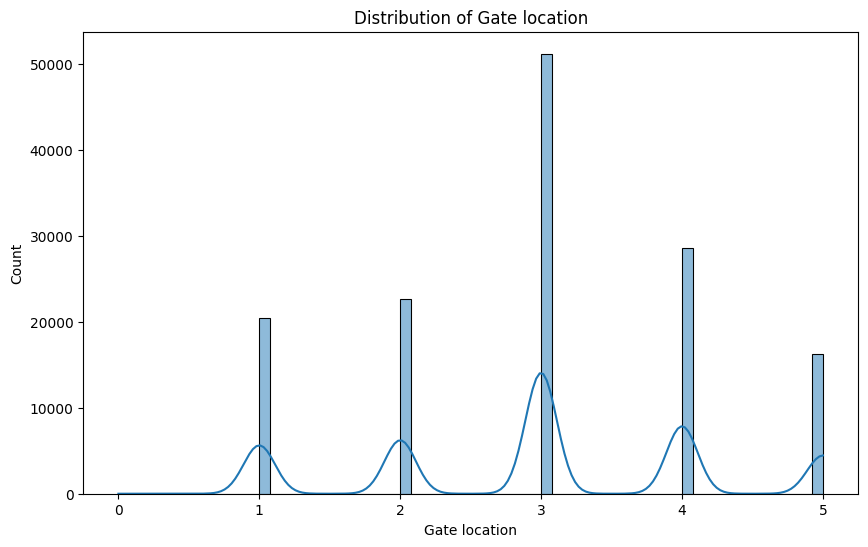

/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


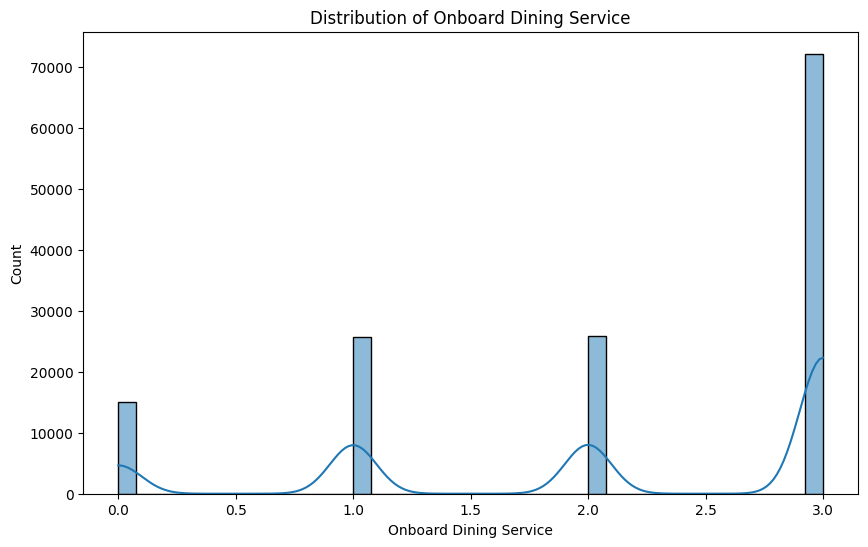

/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


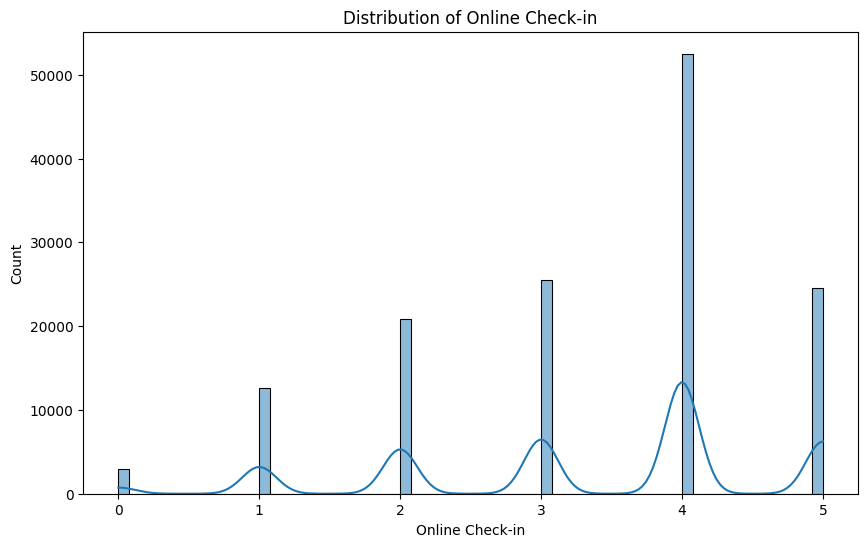

/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


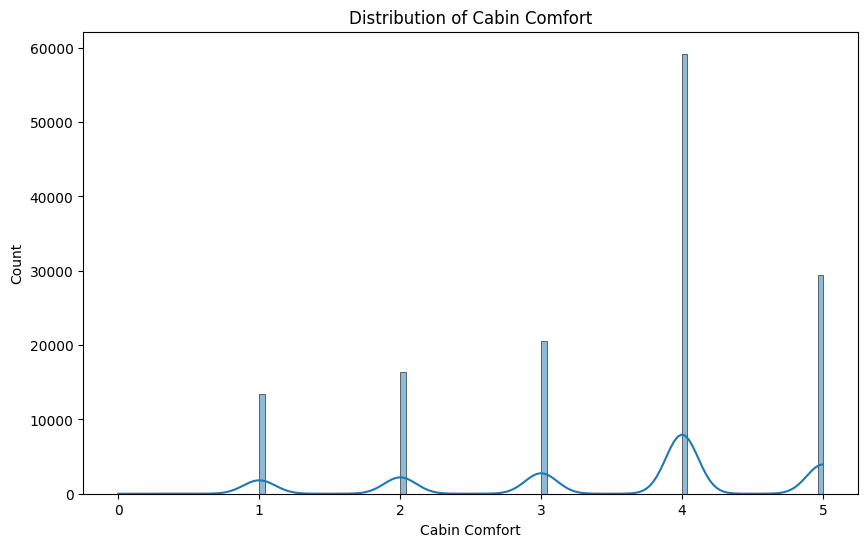

/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


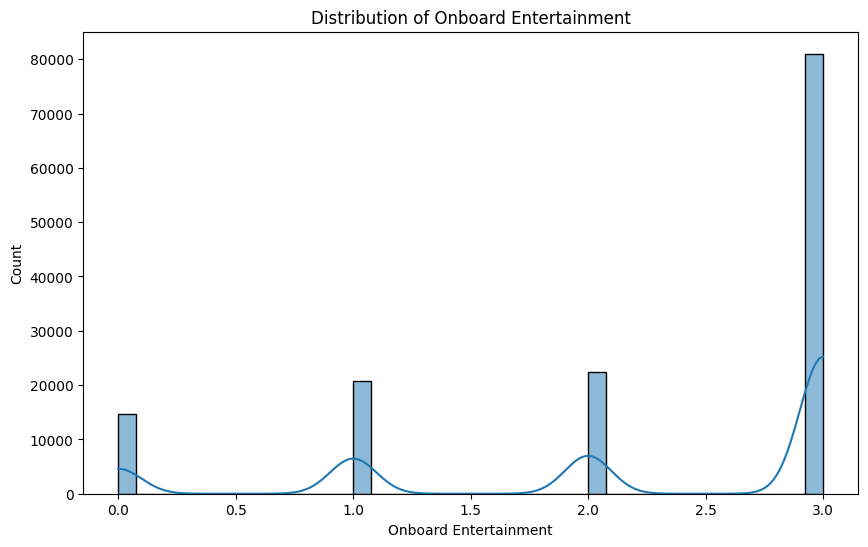

/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


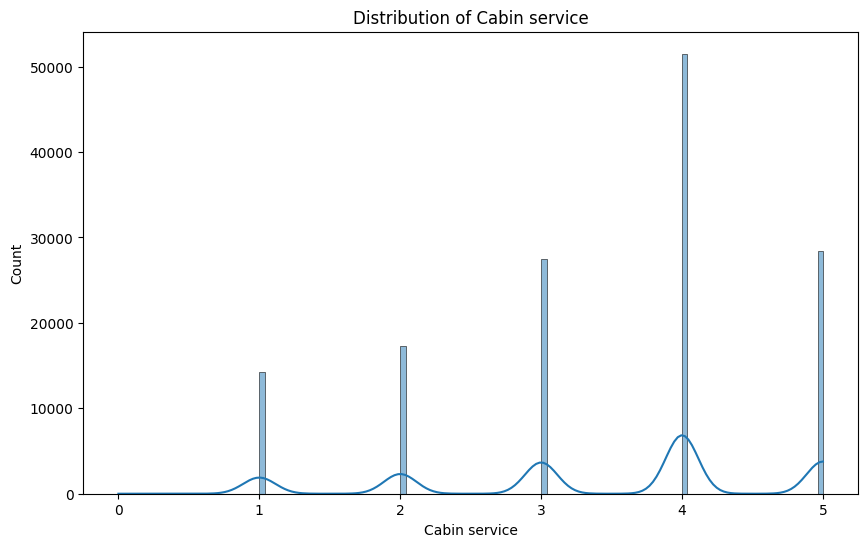

/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


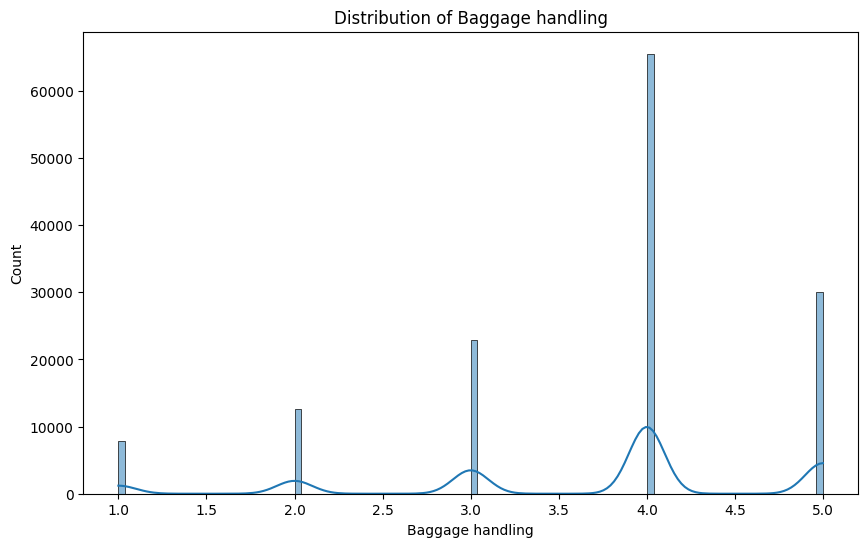

/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


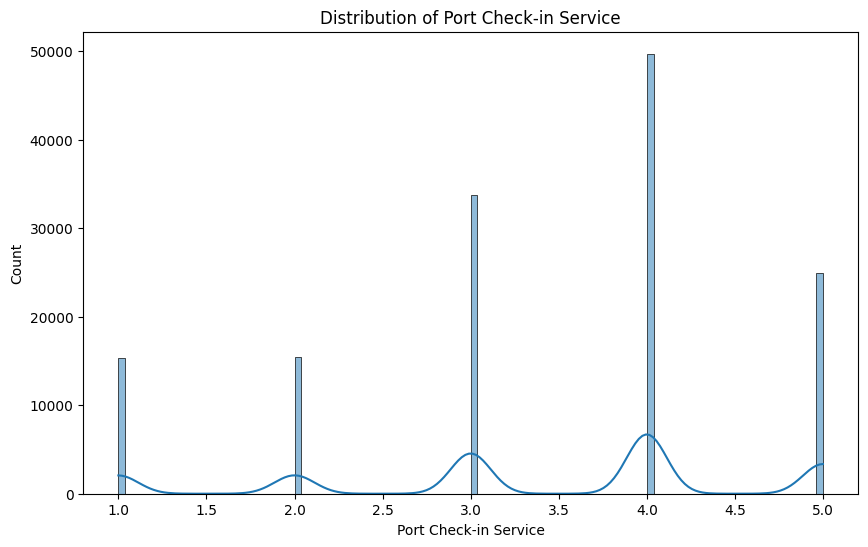

/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


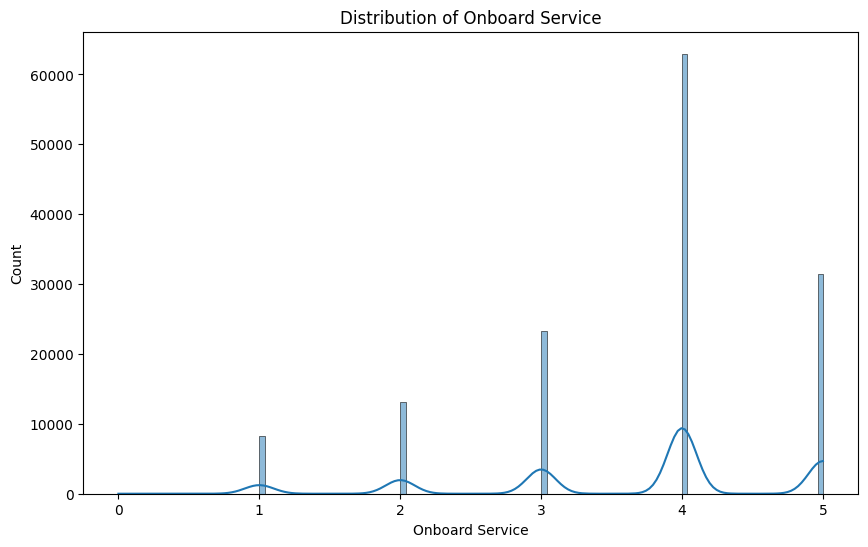

/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


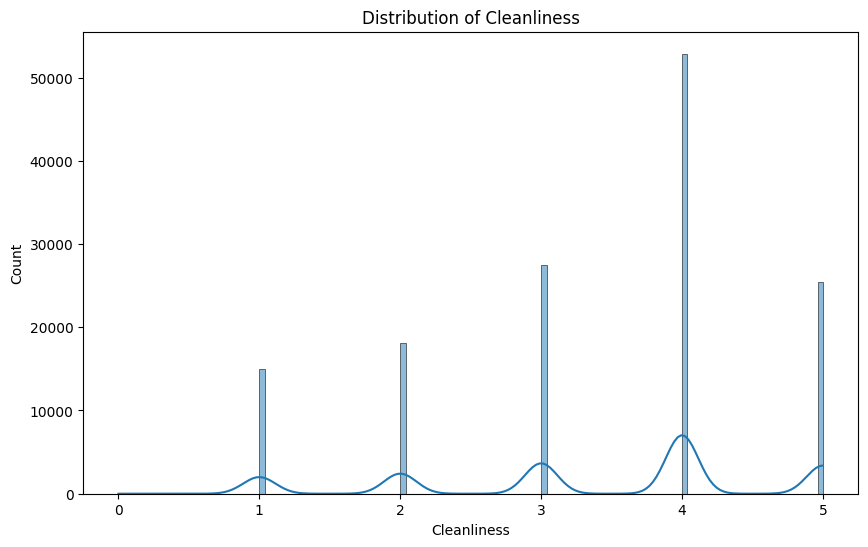

/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


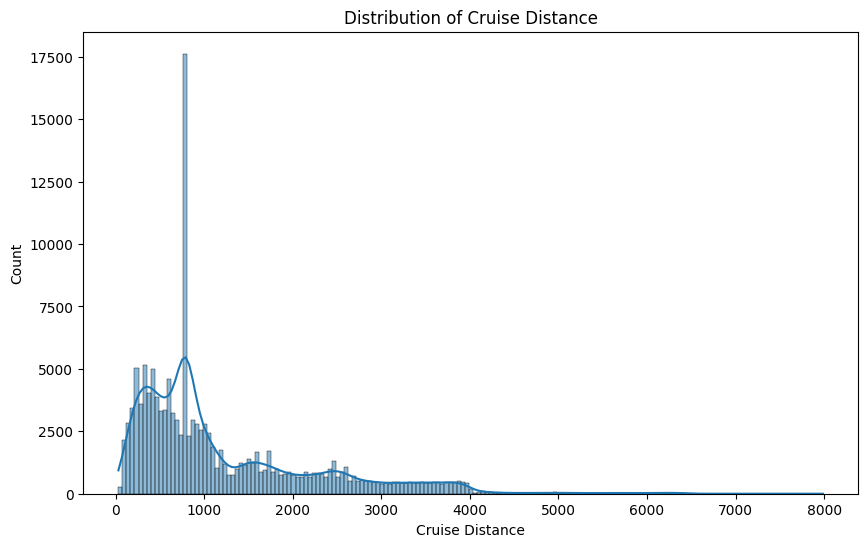

/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


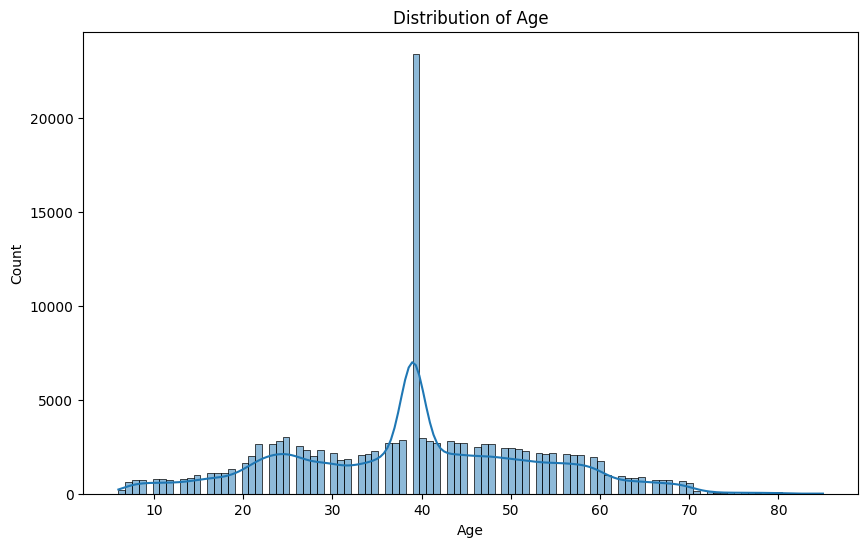

In [52]:
#Visualize Distributions of Numeric Columns

# For every numeric column, plot a histogram
for column in df_encoded.select_dtypes(include=['float64', 'int64']).columns:
    if column in [
                'index_x',
                'index_y', 
                'Date of Birth',
                'WiFi', 
                'Dining', 
                'Entertainment'
    ]:
        pass
    else:
        plt.figure(figsize=(10, 6))
        sns.histplot(df_encoded[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()


/Users/derek/Library/Python/3.9/lib/python/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


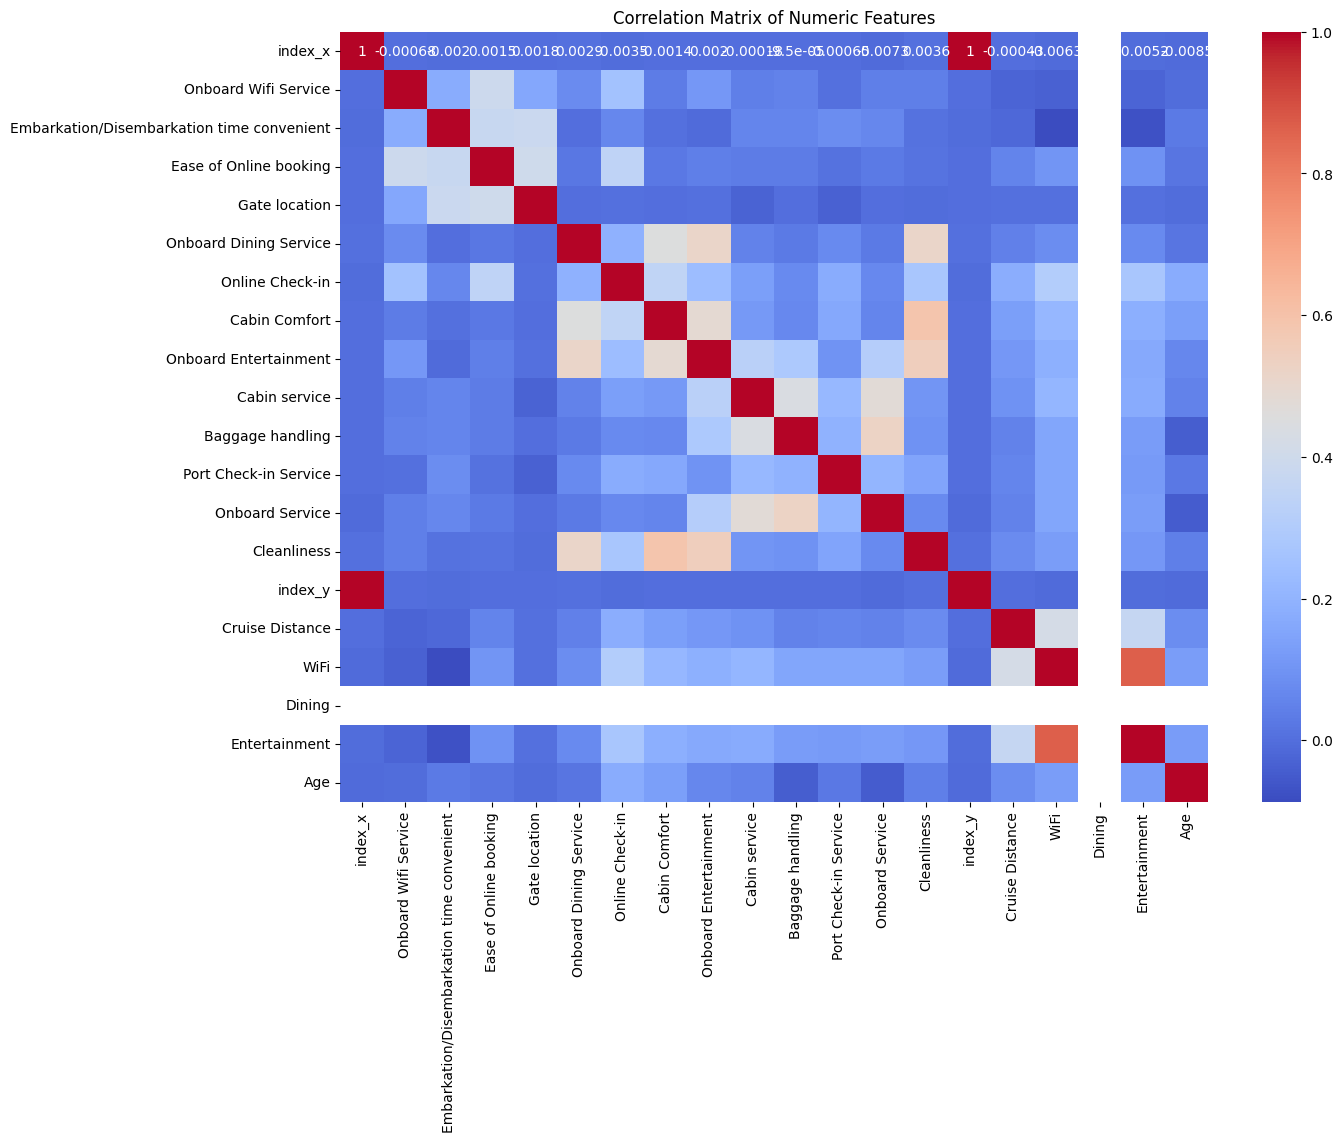

In [54]:
#Visualize Relationships
correlation_matrix = df_encoded.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

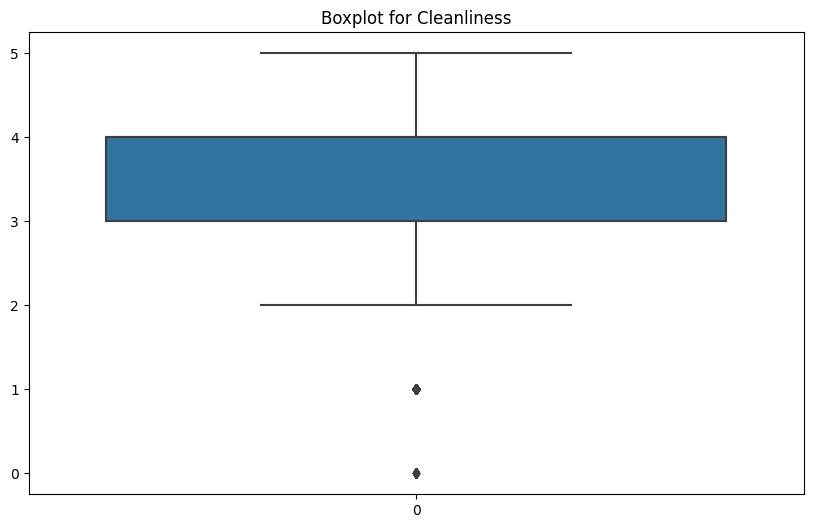

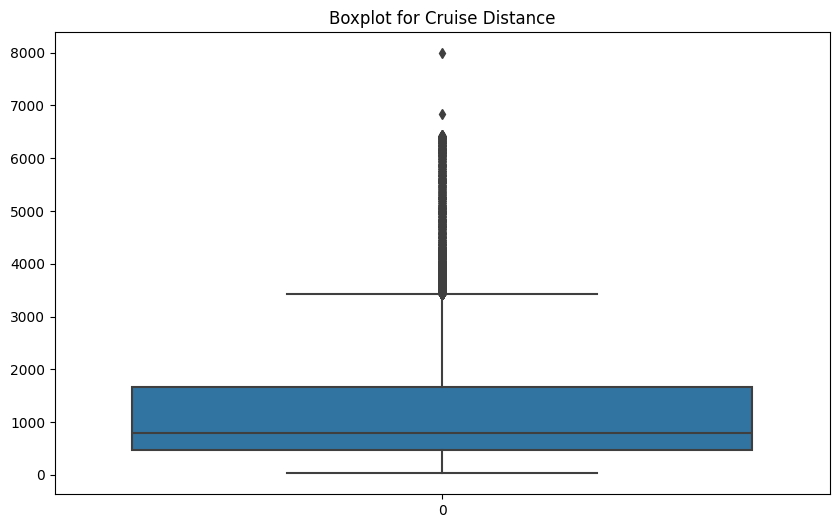

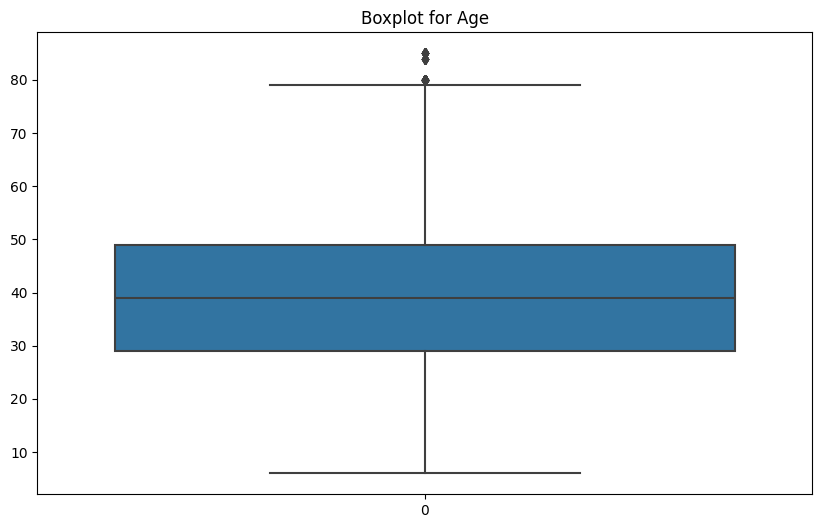

In [63]:
#Visualize Outliers
df_dropped = df_encoded.drop(columns=['index_x',
                'index_y', 
                'Date of Birth',
                'WiFi', 
                'Dining', 
                'Entertainment',
                'Onboard Wifi Service',
                'Embarkation/Disembarkation time convenient',
                'Ease of Online booking',
                'Gate location',
                'Logging',
                'Onboard Dining Service',
                'Online Check-in',
                'Cabin Comfort',
                'Onboard Entertainment',
                'Cabin service',
                'Baggage handling',
                'Port Check-in Service',
                'Onboard Service'])
for column in df_dropped.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df_encoded[column])
    plt.title(f'Boxplot for {column}')
    plt.show()
